# POSTTEST 5 
*Maulana Muhammad Hafidz (2109106070)*

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [23]:
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##  Supervised Learning

### SVM 
Tidak menggunakan data numerik dikarenakan data numerik hanya ada pada rating

In [49]:
# Memilih fitur dan label
X = df[['App', 'Genres']]
y = df['Category']

# Menghapus baris dengan nilai null
X = X.dropna()
y = y[X.index]

# Label encoding untuk kolom 'Category'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encoding untuk kolom 'Genres'
genres_one_hot = pd.get_dummies(X['Genres'], drop_first=True)

In [50]:
# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(genres_one_hot, y, test_size=0.2, random_state=42)

In [51]:
# Membuat dan melatih model SVC menggunakan pipeline
svm_model = Pipeline([
    ('scaler', StandardScaler()),  # Normalisasi data numerik
    ('classifier', SVC())           # Model SVC
])

# Melatih model
svm_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [52]:
# Melakukan prediksi
y_pred = svm_model.predict(X_test)

In [68]:
# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

D:\Kuliah\SEMESTER 5\Kecerdasan Buatan\Praktikum\Posttest\Posttest 1\venv_B1-21\maulana_070\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kuliah\SEMESTER 5\Kecerdasan Buatan\Praktikum\Posttest\Posttest 1\venv_B1-21\maulana_070\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Kuliah\SEMESTER 5\Kecerdasan Buatan\Praktikum\Posttest\Posttest 1\venv_B1-21\maulana_070\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

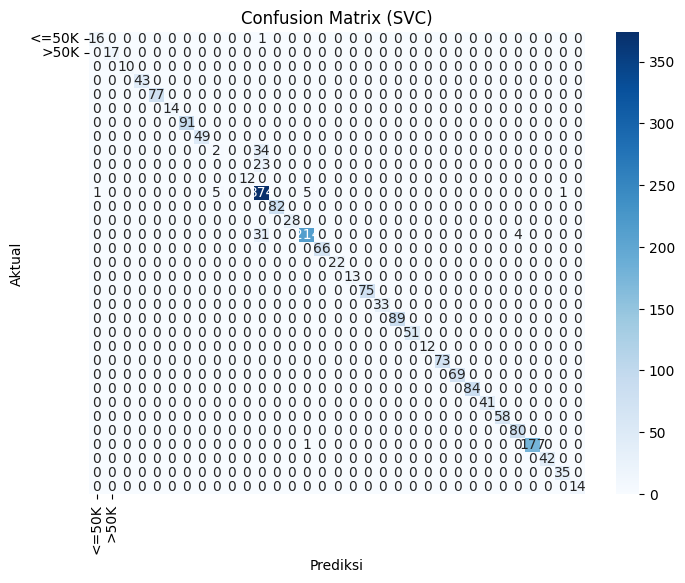

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

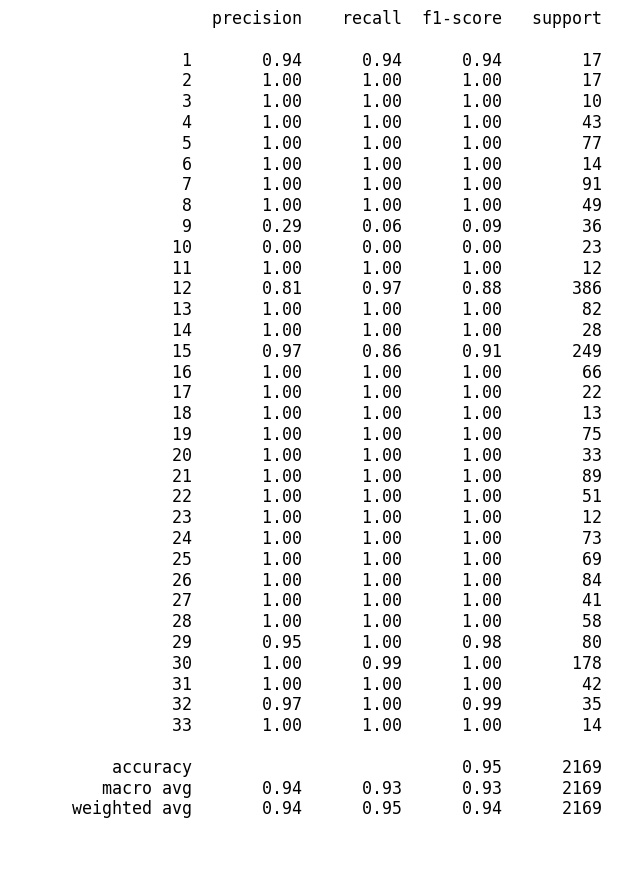

In [70]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, classification_rep, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

### Plot Prediksi

In [127]:


default_color = 'b'  # Warna default untuk nilai yang tidak ada dalam color_map
y_pred_colors = [color_map.get(label, default_color) for label in y_pred]
y_test_colors = [color_map.get(label, default_color) for label in y_test]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


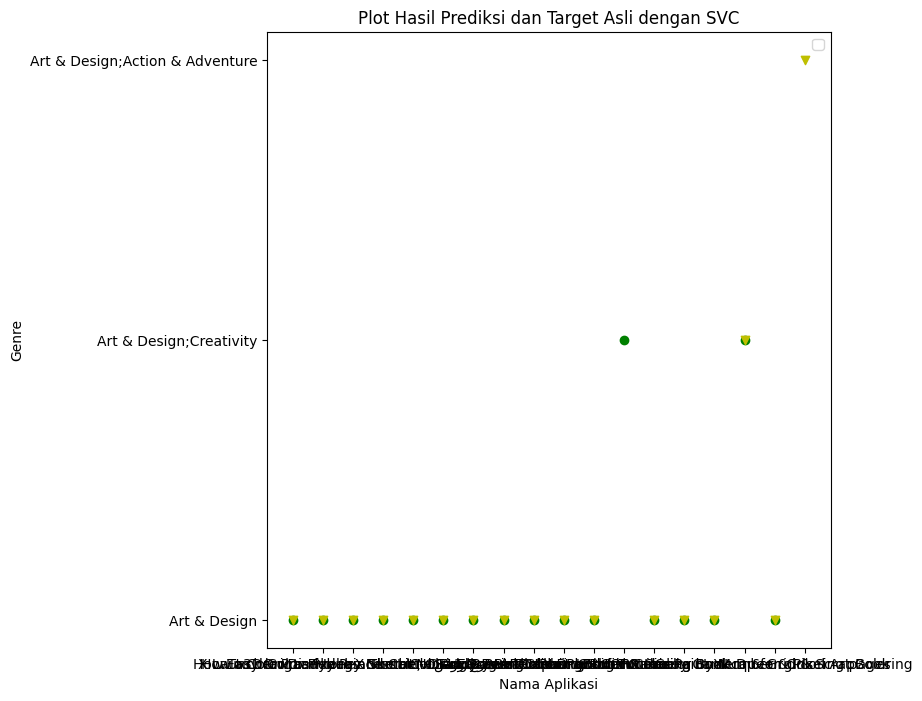

In [133]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Menggunakan DataFrame df untuk mengambil data asli termasuk kolom 'App'
# Titik-titik hasil prediksi SVC dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi <=50K (SVC)
plt.scatter(df.loc[X_test.index, 'App'][y_pred == 0], df.loc[X_test.index, 'Genres'][y_pred == 0], c='r', marker='x')

# Prediksi >50K (SVC)
plt.scatter(df.loc[X_test.index, 'App'][y_pred == 1], df.loc[X_test.index, 'Genres'][y_pred == 1], c='g', marker='o')

# Titik-titik target asli dengan warna berbeda (biru untuk <=50K, kuning untuk >50K)
# Target <=50K
plt.scatter(df.loc[X_test.index, 'App'][y_test == 0], df.loc[X_test.index, 'Genres'][y_test == 0], c='b', marker='^')

# Target >50K
plt.scatter(df.loc[X_test.index, 'App'][y_test == 1], df.loc[X_test.index, 'Genres'][y_test == 1], c='y', marker='v')

plt.xlabel('Nama Aplikasi')
plt.ylabel('Genre')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()

## Unsupervised Learning

### Metode K-Means

In [106]:
# Tampilkan tipe data awal kolom 'Reviews'
print("Tipe data awal kolom 'Reviews':", df['Reviews'].dtype)

# Membersihkan dan mengonversi kolom 'Reviews' ke data numerik
df['Reviews'] = df['Reviews'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')  # 'coerce' untuk mengatasi nilai yang tidak dapat diubah menjadi float

# Tampilkan tipe data setelah konversi
print("Tipe data setelah konversi kolom 'Reviews':", df['Reviews'].dtype)

median_reviews = df['Reviews'].median()
df['Reviews'].fillna(median_reviews, inplace=True)

median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)

Tipe data awal kolom 'Reviews': float64
Tipe data setelah konversi kolom 'Reviews': float64


Menggunakan kolom Rating (kolom ke-2) dan Review (kolom ke-3)

In [108]:
X = df.iloc[:, [2, 3]].values 

Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

In [109]:
wcss = []  

Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)

In [110]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

Buat grafik Elbow Method

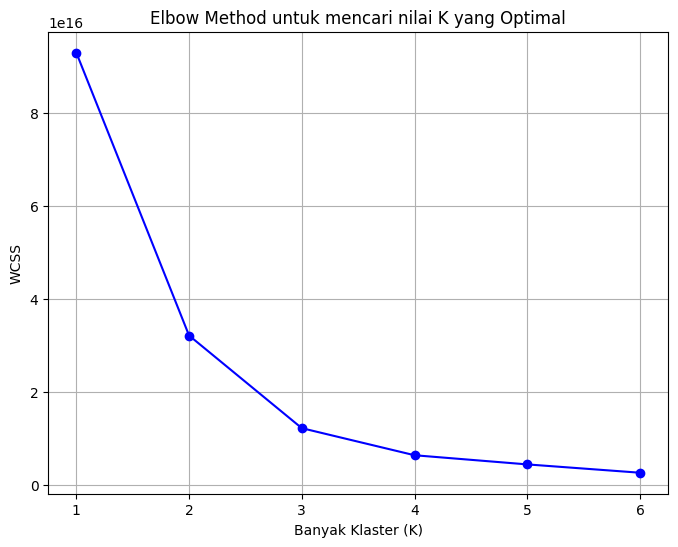

In [111]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Inisialisasi model K-Means dengan nilai K yang sesuai

In [112]:
k = 3 
kmeans = KMeans(k, n_init=10)

Pilih hanya kolom "Rating" dan "Reviews" sebagai fitur 

In [113]:
X = df[["Rating", "Reviews"]]

Fit model K-Means pada dataset

In [114]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Prediksi cluster untuk setiap data point dalam dataset

In [115]:
predicted_clusters = kmeans.predict(X)

Tambahkan kolom "cluster" ke dataset

In [116]:
df["cluster"] = predicted_clusters

a. Unlabeled Dataset (Dataset Tanpa Label)

X adalah dataset yang telah di-cluster dengan K-Means

predicted_clusters adalah hasil clustering yang telah diprediksi

In [117]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.96
Davies-Bouldin Index: 0.39
Calinski-Harabasz Index: 36070.78


In [122]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_mapped'] = kmeans.fit_predict(df[['Rating', 'Reviews']])

D:\Kuliah\SEMESTER 5\Kecerdasan Buatan\Praktikum\Posttest\Posttest 1\venv_B1-21\maulana_070\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


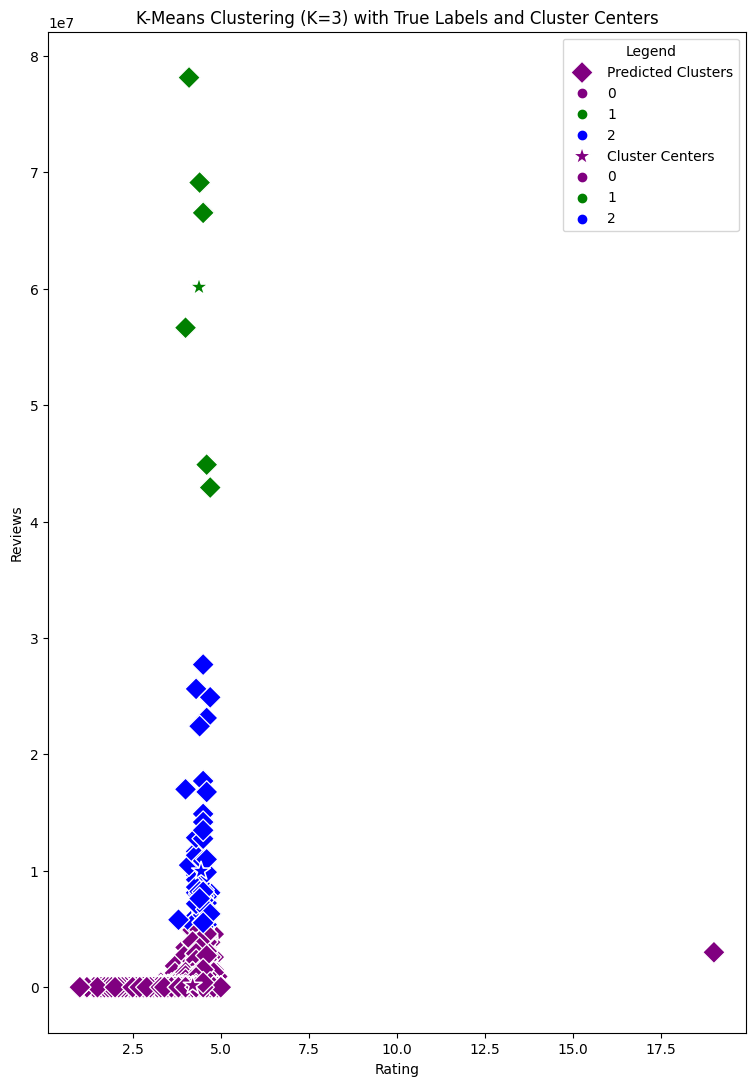

In [123]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=df, x="Rating", y="Reviews", palette=colors,
                hue=df["cluster_mapped"], marker="D", s=130, label="Predicted Clusters")

# Tambahkan titik pusat cluster
cluster_centers = df.groupby("cluster_mapped").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["Rating"], y=cluster_centers["Reviews"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="Cluster Centers")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.legend(title="Legend", loc="upper right")
plt.show()
